<a href="https://colab.research.google.com/github/SahanUday/EN3150-Pattern-Recognition/blob/main/Assignment%2002/Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 Logistic regression

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()
# Make a copy to avoid the warning

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])

# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded'] # Target variable
X = df_filtered.drop(['class_encoded'], axis=1)

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


In [ ]:
df_filtered.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,class_encoded
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0


In [ ]:
X.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [ ]:
print(X.dtypes)

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


###  Train a logistic regression model using "saga" solver with errors


In [ ]:
# #Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

# #Train the logistic regression model. Here we are using saga solver to learn weights.
# logreg = LogisticRegression(solver='saga')
# logreg.fit(X_train, y_train)

# # Predict on the testing data
# y_pred = logreg.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# print(logreg.coef_, logreg.intercept_)

In [ ]:
X['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

### Train Logistic regression model using "saga" solver with scaled data (Corrected Code)

In [ ]:
X_preprocess = X.drop(['sex','island','species'], axis=1)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocess, y,test_size=0.2, random_state=42)

#Train the logistic regression model. Here we are using saga solver to learn weights.
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy: 0.5813953488372093
[[ 2.76091634e-03 -8.10609022e-05  4.72980201e-04 -2.87172982e-04]] [-8.44497714e-06]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
X.shape

(214, 7)

### Train Logistic regression model using "saga" solver with scaled data


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_preprocess)  # X_encoded includes island one-hot

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2, random_state=42)

#Train the logistic regression model. Here we are using saga solver to learn weights.
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy: 0.9767441860465116
[[ 3.94072565 -0.82727348  0.19561625 -0.73524608]] [-1.80135918]


### Train Logistic regression model using "liblinear" solver with non-scaled data

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocess, y,test_size=0.2, random_state=42)

#Train the logistic regression model. Here we are using saga solver to learn weights.
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy: 1.0
[[ 1.45422752 -0.93943994 -0.16571368 -0.00398663]] [-0.04793176]


### Train Logistic regression model using "liblinear" solver with scaled data


In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2, random_state=42)

#Train the logistic regression model. Here we are using saga solver to learn weights.
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy: 0.9767441860465116
[[ 3.84019948 -0.76794126  0.18337305 -0.71426409]] [-1.58640217]


# 3 Logistic regression First/Second-Order Methods

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

print(X)
print(y)

[[-2.19655439 -6.04817613]
 [ 0.81789766  4.8792503 ]
 [ 2.8314302   5.80299161]
 ...
 [-3.26670243 -2.62516778]
 [ 2.23050411  4.08324346]
 [ 0.81695873  4.89150137]]
[0 1 1 ... 0 1 1]


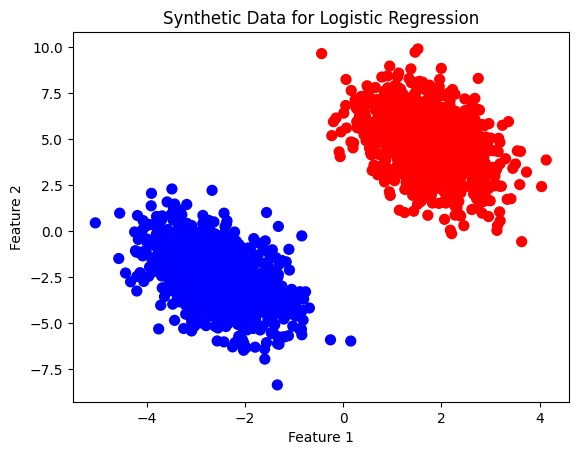

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Data for Logistic Regression')
plt.show()

###  Implement Batch Gradient Descent

In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights
np.random.seed(42)
W = np.random.randn(X.shape[1]) * 0.01  # small random initialization
b = 0.0

# Hyperparameters
lr = 0.1 #learning-rate
iterations = 20

print(f"Initial weights:{W}, Initial bias:{b}")

Initial weights:[ 0.00496714 -0.00138264], Initial bias:0.0


In [ ]:
# Batch Gradient Descent
m = X.shape[0]
losses_gd = []

for i in range(iterations):
    # Forward pass
    z = np.dot(X, W) + b
    y_hat = sigmoid(z)

    # Compute gradients
    dw = (1/m) * np.dot(X.T, (y_hat - y))
    db = (1/m) * np.sum(y_hat - y)

    # Update parameters
    W -= lr * dw
    b -= lr * db

    # Compute loss for monitoring - Binary Cross-Entropy (Log Loss)
    loss = -np.mean(y*np.log(y_hat+1e-9) + (1-y)*np.log(1-y_hat+1e-9))
    losses_gd.append(loss)
    print(f"Iteration {i+1}/{iterations}, Loss: {loss:.4f}")

print("Final weights:", W)
print("Final bias:", b)

Iteration 1/20, Loss: 0.6904
Iteration 2/20, Loss: 0.3539
Iteration 3/20, Loss: 0.2437
Iteration 4/20, Loss: 0.1894
Iteration 5/20, Loss: 0.1564
Iteration 6/20, Loss: 0.1340
Iteration 7/20, Loss: 0.1178
Iteration 8/20, Loss: 0.1053
Iteration 9/20, Loss: 0.0954
Iteration 10/20, Loss: 0.0874
Iteration 11/20, Loss: 0.0807
Iteration 12/20, Loss: 0.0751
Iteration 13/20, Loss: 0.0702
Iteration 14/20, Loss: 0.0660
Iteration 15/20, Loss: 0.0623
Iteration 16/20, Loss: 0.0590
Iteration 17/20, Loss: 0.0561
Iteration 18/20, Loss: 0.0535
Iteration 19/20, Loss: 0.0511
Iteration 20/20, Loss: 0.0490
Final weights: [0.54204219 0.66313971]
Final bias: -0.05299566730950298


Featue2= -0.8173876164134782 *Feature1+ 0.07991629309892853


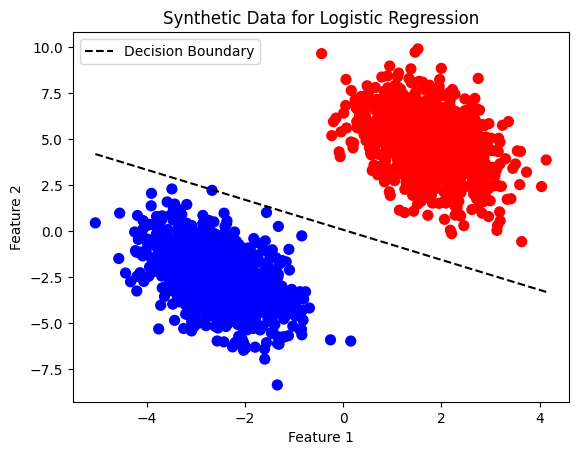

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Data for Logistic Regression')

# Decision boundary line (using final weights and bias from gradient descent)
# Replace these with your actual final w and b values from the previous run
w1 = W[0] # Example final weight for feature 1
w2 = W[1] # Example final weight for feature 2
  # Example final bias

# Equation of the line: w1*x1 + w2*x2 + b = 0
# Rearrange: x2 = (-w1*x1 - b) / w2
x1_range = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
x2_range = (-w1 * x1_range - b) / w2
print(f"Featue2= {-w1/w2} *Feature1+ {-b/w2}")

# Plot the decision boundary
plt.plot(x1_range, x2_range, color='black', linestyle='--', label='Decision Boundary')

# Add legend and show plot
plt.legend()
plt.show()

### Implement Newton’s method

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# ------------------------------
# 1. Generate Data
# ------------------------------
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Add bias term (intercept)
X_aug = np.hstack([np.ones((X.shape[0], 1)), X])  # shape: (2000, 3)
#X_aug=X

# ------------------------------
# 2. Sigmoid Function
# ------------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ------------------------------
# 3. Newton's Method
# ------------------------------
theta = np.zeros(X_aug.shape[1])  # initialize weights & bias as zeros
iterations = 20

losses_newton = []

for i in range(iterations):
    # Predictions
    z = np.dot(X_aug, theta)
    y_hat = sigmoid(z)

    # Gradient
    gradient = np.dot(X_aug.T, (y_hat - y))

    # Hessian
    R = np.diag(y_hat * (1 - y_hat))
    H = np.dot(X_aug.T, np.dot(R, X_aug))

    # Newton's Update
    theta -= np.linalg.inv(H).dot(gradient)

    # Compute loss (binary cross-entropy)
    loss = -np.mean(y*np.log(y_hat+1e-9) + (1-y)*np.log(1-y_hat+1e-9))
    losses_newton.append(loss)
    print(f"Iteration {i+1}/{iterations}, Loss: {loss:.4f}")

print("Final Parameters (W0, W1, W2):", theta)


Iteration 1/20, Loss: 0.6931
Iteration 2/20, Loss: 0.1452
Iteration 3/20, Loss: 0.0528
Iteration 4/20, Loss: 0.0203
Iteration 5/20, Loss: 0.0080
Iteration 6/20, Loss: 0.0032
Iteration 7/20, Loss: 0.0013
Iteration 8/20, Loss: 0.0005
Iteration 9/20, Loss: 0.0002
Iteration 10/20, Loss: 0.0001
Iteration 11/20, Loss: 0.0000
Iteration 12/20, Loss: 0.0000
Iteration 13/20, Loss: 0.0000
Iteration 14/20, Loss: 0.0000
Iteration 15/20, Loss: 0.0000
Iteration 16/20, Loss: 0.0000
Iteration 17/20, Loss: 0.0000
Iteration 18/20, Loss: 0.0000
Iteration 19/20, Loss: 0.0000
Iteration 20/20, Loss: 0.0000
Final Parameters (W0, W1, W2): [-2.93259517 10.56207842  4.32766252]


Featue2= -2.4405965997247328 *Feature1+ 0.6776395256527312


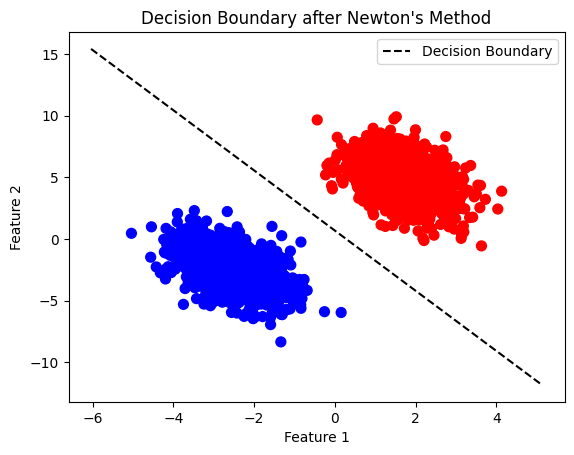

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot of your data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary after Newton\'s Method')

# Extract weights and bias from final theta
b = theta[0]     # bias (intercept)
w1 = theta[1]    # weight for feature 1
w2 = theta[2]    # weight for feature 2

# Equation of decision boundary: w1*x1 + w2*x2 + b = 0
# Solve for x2: x2 = (-w1*x1 - b)/w2
x1_range = np.linspace(min(X[:, 0])-1, max(X[:, 0])+1, 100)
x2_range = (-w1 * x1_range - b) / w2
print(f"Featue2= {-w1/w2} *Feature1+ {-b/w2}")

# Plot decision boundary
plt.plot(x1_range, x2_range, color='black', linestyle='--', label='Decision Boundary')

plt.legend()
plt.show()


###  Loss vs number of iterations for BGD and Newton method

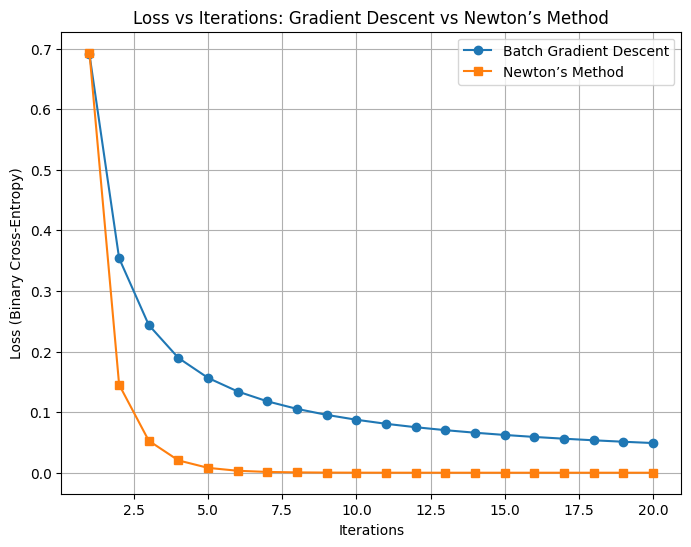

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

plt.figure(figsize=(8, 6))
plt.plot(range(1, iterations+1), losses_gd, label='Batch Gradient Descent', marker='o')
plt.plot(range(1, iterations+1), losses_newton, label='Newton’s Method', marker='s')
plt.xlabel("Iterations")
plt.ylabel("Loss (Binary Cross-Entropy)")
plt.title("Loss vs Iterations: Gradient Descent vs Newton’s Method")
plt.legend()
plt.grid(True)
plt.show()


###  Changed to centers = [[2, 2], [5, 1.5]].

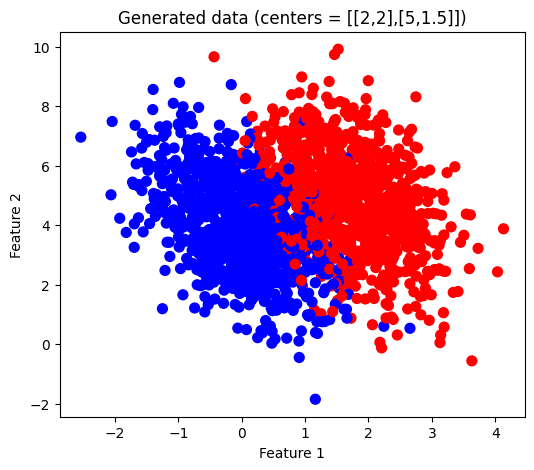

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# ------------------------------
# 1. Generate Data (new centers)
# ------------------------------
np.random.seed(0)
centers = [[2, 2], [5, 1.5]]                # <-- changed centers
Xnew, ynew = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
Xnew = np.dot(Xnew, transformation)

# Visualize raw data
plt.figure(figsize=(6,5))
plt.scatter(Xnew[:,0], Xnew[:,1], c=ynew, cmap='bwr', s=50)
plt.title("Generated data (centers = [[2,2],[5,1.5]])")
plt.xlabel("Feature 1"); plt.ylabel("Feature 2")
plt.show()



In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights
np.random.seed(42)
Wnew = np.random.randn(Xnew.shape[1]) * 0.01  # small random initialization
bnew = 0.0

# Hyperparameters
lr = 0.1 #learning-rate
iterations = 20

print(f"Initial weights:{Wnew}, Initial bias:{bnew}")

Initial weights:[ 0.00496714 -0.00138264], Initial bias:0.0


In [ ]:
# Batch Gradient Descent
m = Xnew.shape[0]
losses_gdnew = []

for i in range(iterations):
    # Forward pass
    z = np.dot(Xnew, Wnew) + bnew
    y_hat = sigmoid(z)

    # Compute gradients
    dw = (1/m) * np.dot(Xnew.T, (y_hat - ynew))
    db = (1/m) * np.sum(y_hat - ynew)

    # Update parameters
    Wnew -= lr * dw
    bnew -= lr * db

    # Compute loss for monitoring - Binary Cross-Entropy (Log Loss)
    loss = -np.mean(ynew*np.log(y_hat+1e-9) + (1-ynew)*np.log(1-y_hat+1e-9))
    losses_gdnew.append(loss)
    print(f"Iteration {i+1}/{iterations}, Loss: {loss:.4f}")

print("Final weights:", Wnew)
print("Final bias:", bnew)

Iteration 1/20, Loss: 0.6913
Iteration 2/20, Loss: 0.6710
Iteration 3/20, Loss: 0.6558
Iteration 4/20, Loss: 0.6422
Iteration 5/20, Loss: 0.6296
Iteration 6/20, Loss: 0.6177
Iteration 7/20, Loss: 0.6066
Iteration 8/20, Loss: 0.5962
Iteration 9/20, Loss: 0.5864
Iteration 10/20, Loss: 0.5771
Iteration 11/20, Loss: 0.5684
Iteration 12/20, Loss: 0.5602
Iteration 13/20, Loss: 0.5525
Iteration 14/20, Loss: 0.5451
Iteration 15/20, Loss: 0.5382
Iteration 16/20, Loss: 0.5316
Iteration 17/20, Loss: 0.5254
Iteration 18/20, Loss: 0.5195
Iteration 19/20, Loss: 0.5138
Iteration 20/20, Loss: 0.5085
Final weights: [ 0.59600527 -0.03484302]
Final bias: -0.10143724699628096


Decision Boundary: Feature2 = 17.1054 * Feature1 + -2.9113


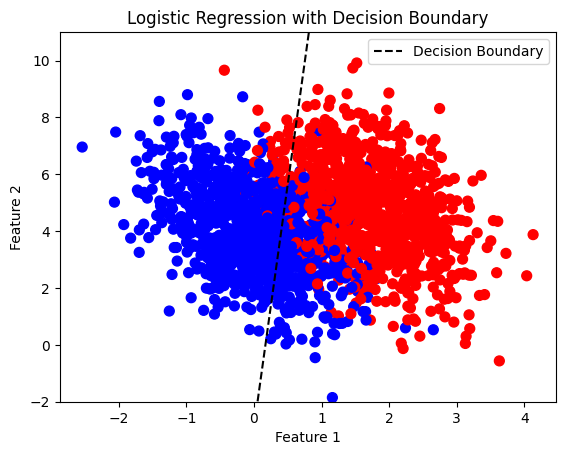

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot of data
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, cmap='bwr', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression with Decision Boundary')

# Extract final weights and bias from gradient descent
w1, w2 = Wnew[0], Wnew[1]
b = bnew

# Equation of the decision boundary: w1*x1 + w2*x2 + b = 0
# Rearranged: x2 = -(w1*x1 + b)/w2
x1_range = np.linspace(min(Xnew[:, 0]), max(Xnew[:, 0]), 100)
x2_range = -(w1 * x1_range + b) / w2

# Print the line equation in slope-intercept form
print(f"Decision Boundary: Feature2 = {-w1/w2:.4f} * Feature1 + {-b/w2:.4f}")

# Plot the decision boundary
plt.plot(x1_range, x2_range, color='black', linestyle='--', label='Decision Boundary')

# Set y-axis range
plt.ylim(-2, 11)

# Add legend and show plot
plt.legend()
plt.show()


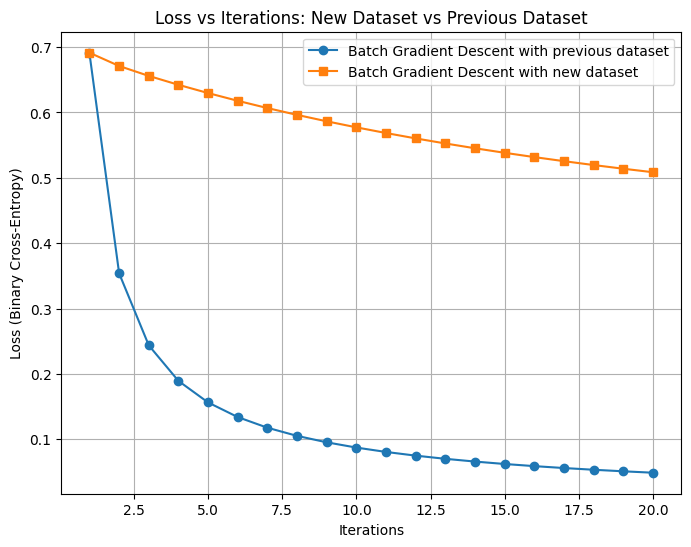

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

plt.figure(figsize=(8, 6))
plt.plot(range(1, iterations+1), losses_gd, label='Batch Gradient Descent with previous dataset', marker='o')
plt.plot(range(1, iterations+1), losses_gdnew, label='Batch Gradient Descent with new dataset', marker='s')
plt.xlabel("Iterations")
plt.ylabel("Loss (Binary Cross-Entropy)")
plt.title("Loss vs Iterations: New Dataset vs Previous Dataset")
plt.legend()
plt.grid(True)
plt.show()
